In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from des_helpers import dpa_select_function

# Load preprocessed data
trace_df = pd.read_csv("des_extension_data.csv")
plaintexts = trace_df['Plaintext'].to_numpy()
powers = trace_df['Power'].to_numpy()

In [24]:
# from joblib import Parallel, delayed

# kc = 4

# # Number of measurements
# n_measurements = range(10, 1001, 10)

# sr_sets = {
#     "SR_1": (kc, [0]),
#     "SR_2": (kc, [0,1]),
#     "SR_8": (kc, [0,1,2,3,5,6,7,8]), # skip 4 since it is kc
#     "SR_63": (kc, [k for k in range(64) if k != kc])
# }

# select_outputs_on_key = []
# for i in range(64):
#     select_outputs_on_key.append(np.array([dpa_select_function(pt, i) for pt in plaintexts]))

# def calc_doms(keys, indexes):
#     doms = {}
#     for key in keys:
#         sel_values = select_outputs_on_key[key][indexes]
#         mask0 = sel_values == 0
#         mask1 = sel_values == 1
#         group0_powers = powers[indexes][mask0]
#         group1_powers = powers[indexes][mask1]
#         avg_group0 = np.mean(group0_powers) if group0_powers.size > 0 else 0
#         avg_group1 = np.mean(group1_powers) if group1_powers.size > 0 else 0
#         doms[key] = avg_group1 - avg_group0
#     return doms

# def trial_success(sample_indexes, kc, k_guesses):
#     doms = calc_doms([kc] + k_guesses, sample_indexes)
#     kc_dom = doms[kc]
#     for k in k_guesses:
#         if kc_dom < doms[k]:
#             return False
#     return True

# trails = 1000
# sr_data = {}

# for sr in sr_sets:
#     sr_data[sr] = []
#     kc = sr_sets[sr][0]
#     k_guesses = sr_sets[sr][1]
    
#     for n in n_measurements:
#         samples = [trace_df.sample(n).index for _ in range(trails)]
#         results = Parallel(n_jobs=4)(
#             delayed(trial_success)(sample, kc, k_guesses) for sample in samples
#         )
#         success_rate = sum(results) / trails
#         sr_data[sr].append(success_rate)
#         print(f"{sr}: num measures {n}")

In [25]:
# import pickle
# # Save the arrays using pickle
# with open("emprical_sr.pkl", "wb") as f:
#     pickle.dump(sr_data, f)
# print(f"Confusion data saved to emprical_sr.pkl")

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from scipy.stats import multivariate_normal

def load_confusion_data_pickle(input_path="confusion_Kc.pkl"):
	with open(input_path, "rb") as f:
		data = pickle.load(f)
	print(f"Confusion data loaded from {input_path}")
	return data

# Load confusion matrix K
K = load_confusion_data_pickle("confusion_Kc=4.pkl")[:8, :8]
K_star = load_confusion_data_pickle("confusion_Kc_star=4.pkl")[:8, :8]

# Confusion vector (diagonal of K)
kappa = np.diag(K)

# Constants
# kc DOM
epsilon = 7.177994083404883
sigma = powers.std()
snr = epsilon/sigma
print(f"epsilion = {epsilon}, sigma = {sigma}, SNR = {snr}")

mu = 0.5 * (epsilon / sigma) ** 2 * kappa
Sigma = (epsilon / sigma) ** 2 * K + 0.25 * (epsilon / sigma) ** 4 * (K - kappa @ kappa.T)

rv = multivariate_normal(mean=mu, cov=Sigma)

Confusion data loaded from confusion_Kc=4.pkl
Confusion data loaded from confusion_Kc_star=4.pkl
epsilion = 7.177994083404883, sigma = 73.25056112940295, SNR = 0.09799234262143582


In [27]:
adjusted_matrix = K + (epsilon / (2 * sigma)) ** 2 * (K - kappa @ kappa.T)

# sqrt
sqrt_matrix = sqrtm(adjusted_matrix)

# # Inverse of the adjusted matrix
matrix_sqrt_inv = np.linalg.inv(sqrt_matrix)

term = (epsilon / (2 * sigma)) * matrix_sqrt_inv @ kappa

# Number of measurements
n_measurements = range(10, 1001, 10)

# Calculate SR_63
success_rate_sr8 = []
for n in n_measurements:
	x = np.sqrt(n) * term
	sr = rv.cdf(np.sqrt(n) * term)
	print(sr)
	success_rate_sr8.append(sr)

0.36789051830285624
0.513457063575716
0.6240318770970216
0.7096515778653961
0.7761214582557271
0.8276774466209721
0.8675678888494412
0.8983652672304349
0.9220973305490943
0.9403442297141604
0.9543724894138609
0.9651230500240433
0.9733489944499883
0.9796456012063999
0.9844558093088209
0.9881440383246967
0.9909522554351102
0.9931029098984394
0.9947366620069067
0.9959876694557295
0.9969421164031349
0.9976661311794789
0.9982189089048379
0.998640951776045
0.9989632448184893
0.9992201913736776
0.9993991278093781
0.9995371172482194
0.9996501681806398
0.9997358825358823
0.9997958450700101
0.9998451186500616
0.9998926287975362
0.9999117303070687
0.9999353873923476
0.999948587534868
0.9999633842769124
0.9999666282928584
0.9999771848143547
0.9999815433133128
0.9999879270225884
0.9999914245496037
0.9999919058625673
0.9999955377924133
0.9999960798670431
0.9999961993887824
0.9999974456902692
0.9999983975707194
0.9999976898833138
0.9999991321520606
0.999999345089627
0.9999993711198185
0.9999995858056

In [28]:
# Load confusion matrix K SR
K = load_confusion_data_pickle("confusion_Kc=4.pkl")[:2, :2]
K_star = load_confusion_data_pickle("confusion_Kc_star=4.pkl")[:2, :2]

# Confusion vector (diagonal of K)
kappa = np.diag(K)

# Constants
# kc DOM
epsilon = 7.177994083404883
sigma = powers.std()
snr = epsilon/sigma
print(f"epsilion = {epsilon}, sigma = {sigma}, SNR = {snr}")

mu = 0.5 * (epsilon / sigma) ** 2 * kappa
Sigma = (epsilon / sigma) ** 2 * K + 0.25 * (epsilon / sigma) ** 4 * (K - kappa @ kappa.T)

rv = multivariate_normal(mean=mu, cov=Sigma)

adjusted_matrix = K + (epsilon / (2 * sigma)) ** 2 * (K - kappa @ kappa.T)

# sqrt
sqrt_matrix = sqrtm(adjusted_matrix)

# # Inverse of the adjusted matrix
matrix_sqrt_inv = np.linalg.inv(sqrt_matrix)

term = (epsilon / (2 * sigma)) * matrix_sqrt_inv @ kappa

# Number of measurements
n_measurements = range(10, 1001, 10)

# Calculate SR_2
success_rate_sr2 = []
for n in n_measurements:
	x = np.sqrt(n) * term
	sr = rv.cdf(np.sqrt(n) * term)
	print(sr)
	success_rate_sr2.append(sr)

Confusion data loaded from confusion_Kc=4.pkl
Confusion data loaded from confusion_Kc_star=4.pkl
epsilion = 7.177994083404883, sigma = 73.25056112940295, SNR = 0.09799234262143582
0.8469248176987926
0.9526925188972065
0.9846249523509372
0.9948708432185526
0.9982595477275295
0.9994021766041525
0.9997927579298491
0.9999276404053835
0.9999745902990141
0.9999910355144669
0.9999968251450676
0.9999988719572376
0.9999995980990323
0.9999998564721817
0.999999948638129
0.9999999815870957
0.9999999933886721
0.9999999976228129
0.9999999991441816
0.9999999996915473
0.999999999888715
0.999999999959813
0.9999999999854756
0.9999999999947464
0.9999999999980984
0.9999999999993112
0.9999999999997504
0.9999999999999094
0.9999999999999671
0.999999999999988
0.9999999999999958
0.9999999999999984
0.9999999999999993
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

In [29]:
# Load confusion matrix K SR
K = load_confusion_data_pickle("confusion_Kc=4.pkl")[:1, :1]
K_star = load_confusion_data_pickle("confusion_Kc_star=4.pkl")[:1, :1]

# Confusion vector (diagonal of K)
kappa = np.diag(K)

# Constants
# kc DOM
epsilon = 7.177994083404883
sigma = powers.std()
snr = epsilon/sigma
print(f"epsilion = {epsilon}, sigma = {sigma}, SNR = {snr}")

mu = 0.5 * (epsilon / sigma) ** 2 * kappa
Sigma = (epsilon / sigma) ** 2 * K + 0.25 * (epsilon / sigma) ** 4 * (K - kappa @ kappa.T)

rv = multivariate_normal(mean=mu, cov=Sigma)

adjusted_matrix = K + (epsilon / (2 * sigma)) ** 2 * (K - kappa @ kappa.T)

# sqrt
sqrt_matrix = sqrtm(adjusted_matrix)

# # Inverse of the adjusted matrix
matrix_sqrt_inv = np.linalg.inv(sqrt_matrix)

term = (epsilon / (2 * sigma)) * matrix_sqrt_inv @ kappa

# Number of measurements
n_measurements = range(10, 1001, 10)

# Calculate SR_1
success_rate_sr1 = []
for n in n_measurements:
	x = np.sqrt(n) * term
	sr = rv.cdf(np.sqrt(n) * term)
	print(sr)
	success_rate_sr1.append(sr)

Confusion data loaded from confusion_Kc=4.pkl
Confusion data loaded from confusion_Kc_star=4.pkl
epsilion = 7.177994083404883, sigma = 73.25056112940295, SNR = 0.09799234262143582
0.9387807149188055
0.9860525916016464
0.9965403637479601
0.999107528456666
0.999764448331355
0.9999368889087648
0.9999829096901444
0.9999953350894131
0.9999987188271006
0.9999996464090286
0.9999999020214986
0.9999999727602678
0.9999999924056286
0.9999999978776306
0.9999999994056407
0.9999999998332516
0.999999999953144
0.999999999986815
0.9999999999962852
0.9999999999989522
0.9999999999997041
0.9999999999999164
0.9999999999999764
0.9999999999999933
0.9999999999999981
0.9999999999999994
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


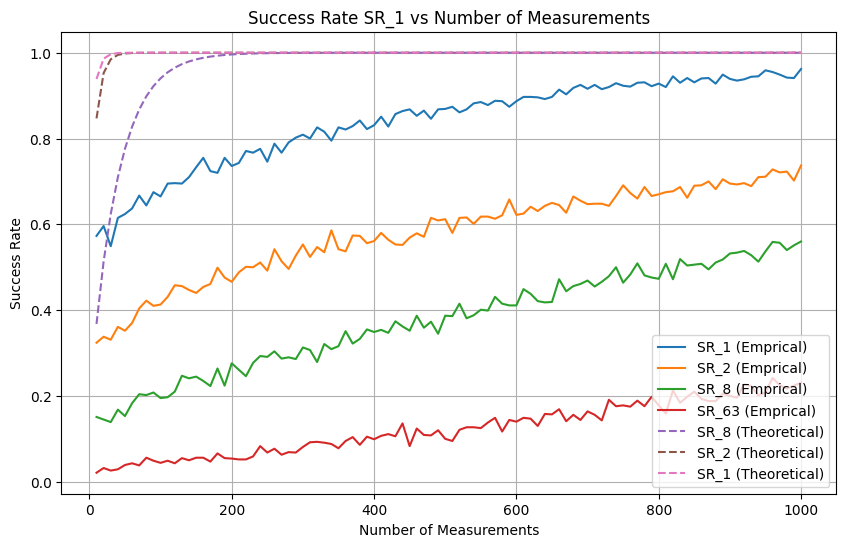

In [30]:
# Plot SR_63
import pickle
import matplotlib.pyplot as plt

kc = 4

with open("emprical_sr.pkl", "rb") as f:
    sr_data = pickle.load(f)

# Number of measurements
n_measurements = range(10, 1001, 10)

sr_sets = {
    "SR_1": (kc, [0]),
    "SR_2": (kc, [0,1]),
    "SR_8": (kc, [0,1,2,3,5,6,7,8]), # skip 4 since it is kc
    "SR_63": (kc, [k for k in range(64) if k != kc])
}

plt.figure(figsize=(10, 6))
for sr in sr_sets:
    plt.plot(n_measurements, sr_data[sr], label=f"{sr} (Emprical)")
plt.plot(n_measurements, success_rate_sr8, "--", label=f"SR_8 (Theoretical)")
plt.plot(n_measurements, success_rate_sr2, "--", label=f"SR_2 (Theoretical)")
plt.plot(n_measurements, success_rate_sr1, "--", label=f"SR_1 (Theoretical)")
plt.xlabel("Number of Measurements")
plt.ylabel("Success Rate")
plt.title("Success Rate SR_1 vs Number of Measurements")
plt.legend()
plt.grid()
plt.show()